In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from minuit import Minuit
j = complex(0,1)

ModuleNotFoundError: No module named 'minuit'

In [44]:
def resonance(x, par1,par2,par3,par4,par5,par6,par7,par8, fmin):
    f = np.abs(par6 *x + par7 *x**2 + par8 *x**3 +
               par1 * (1 - np.exp(j * par4) * par2 * (par2**-1 - (par3)**-1) /
               (1 + 2*j * par2 * (x - par5) / fmin)))
    return f

In [45]:
stringa = 'C:/Users/kid/SynologyDrive/Lab2023/KIDs/QTLab2324/IRDetection/Test_data/Resonance02.txt'
dati = list(np.genfromtxt(stringa))

In [46]:
f = []
Q = []
I = []
for i in dati:
    f.append(i[0])
    I.append(i[1])
    Q.append(i[2])
f = np.array(f)
Q = np.array(Q)
I = np.array(I)

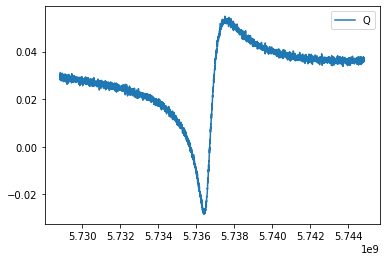

In [47]:
plt.plot(f,Q, label='Q')
plt.legend()

In [48]:
fmin = f[I==min(I)]
params = [1,1,1,1,1,1,1,1,fmin]

In [49]:
popt, pcov = curve_fit(resonance, xdata=f, ydata=I, p0=params)

c:\Users\kid\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

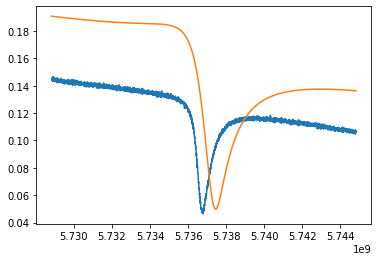

In [196]:
y = S21_abs(f, par[0],par[1],par[2],par[3],par[4], par[5],par[6])
plt.plot(f, S21)
plt.plot(f, y)

In [84]:
popt

array([1.26508254e-01, 4.38252941e+03, 6.95302132e+03, 8.74584507e-01,
       5.73642093e+09])